In [26]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as st 
from scipy.stats import linregress 
import datetime 
import matplotlib


In [27]:
#filter animal bite data for the 5 years
AnimalBites= pd.read_csv("Resources/datasets_2515_4202_Health_AnimalBites.csv")
AnimalBites.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,2013-03-01 00:00:00,DOG,NaN,MALE,BLK WHT,NaN,NaN,NaN,NaN,BODY,NaN,NaN,2013-03-08 00:00:00,NaN,NaN
1,2013-03-01 00:00:00,DOG,DALMATIAN,NaN,NaN,NaN,NaN,NaN,NaN,BODY,NaN,NaN,2013-03-08 00:00:00,NaN,NaN
2,2013-04-12 00:00:00,DOG,HUSKY,NaN,NaN,NaN,NaN,NaN,YES,BODY,NaN,NaN,2013-04-12 00:00:00,NaN,NEGATIVE
3,2013-08-07 00:00:00,DOG,BORDER COLLIE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-08 00:00:00,NaN,NEGATIVE
4,2013-08-15 00:00:00,CAT,NaN,NaN,ORGE WHITE,NaN,NaN,40214,NaN,BODY,NaN,NaN,2013-08-15 00:00:00,NaN,NaN


In [28]:
#Convert to dataframe
ABites_df= pd.DataFrame(AnimalBites)
ABites_df

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,2013-03-01 00:00:00,DOG,NaN,MALE,BLK WHT,NaN,NaN,NaN,NaN,BODY,NaN,NaN,2013-03-08 00:00:00,NaN,NaN
1,2013-03-01 00:00:00,DOG,DALMATIAN,NaN,NaN,NaN,NaN,NaN,NaN,BODY,NaN,NaN,2013-03-08 00:00:00,NaN,NaN
2,2013-04-12 00:00:00,DOG,HUSKY,NaN,NaN,NaN,NaN,NaN,YES,BODY,NaN,NaN,2013-04-12 00:00:00,NaN,NEGATIVE
3,2013-08-07 00:00:00,DOG,BORDER COLLIE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-08 00:00:00,NaN,NEGATIVE
4,2013-08-15 00:00:00,CAT,NaN,NaN,ORGE WHITE,NaN,NaN,40214,NaN,BODY,NaN,NaN,2013-08-15 00:00:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5262,2017-09-05 00:00:00,DOG,NaN,NaN,NaN,NaN,NaN,40243,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN
5263,2017-09-07 00:00:00,DOG,POMERANIAN,MALE,RED,NaN,NaN,40204,NaN,HEAD,NaN,NaN,NaN,NaN,NaN
5264,2017-09-07 00:00:00,DOG,LABRADOR RETRIV,MALE,BROWN,NaN,NaN,47130,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN
5265,2017-09-07 00:00:00,DOG,LABRADOR RETRIV,FEMALE,BLK WHT,NaN,NaN,40229,NaN,BODY,NaN,NaN,NaN,NaN,NaN


In [29]:
bites_narrowed_df= ABites_df[['bite_date', 'SpeciesIDDesc', 'BreedIDDesc', 'victim_zip', 'WhereBittenIDDesc', 'GenderIDDesc']]
bites_narrowed_df

,bite_date,SpeciesIDDesc,BreedIDDesc,victim_zip,WhereBittenIDDesc,GenderIDDesc
0,2013-03-01 00:00:00,DOG,NaN,NaN,BODY,MALE
1,2013-03-01 00:00:00,DOG,DALMATIAN,NaN,BODY,NaN
2,2013-04-12 00:00:00,DOG,HUSKY,NaN,BODY,NaN
3,2013-08-07 00:00:00,DOG,BORDER COLLIE,NaN,NaN,NaN
4,2013-08-15 00:00:00,CAT,NaN,40214,BODY,NaN
...,...,...,...,...,...,...
5262,2017-09-05 00:00:00,DOG,NaN,40243,UNKNOWN,NaN
5263,2017-09-07 00:00:00,DOG,POMERANIAN,40204,HEAD,MALE
5264,2017-09-07 00:00:00,DOG,LABRADOR RETRIV,47130,UNKNOWN,MALE
5265,2017-09-07 00:00:00,DOG,LABRADOR RETRIV,40229,BODY,FEMALE


In [30]:
clean_data = bites_narrowed_df.rename(columns={"bite_date":"Year","SpeciesIDDesc":"Animal","BreedIDDesc":"Breed",
                                         "victim_zip":"Zipcode","WhereBittenIDDesc":"Where Biten","GenderIDDesc":"Gender"})
clean_data 

,Year,Animal,Breed,Zipcode,Where Biten,Gender
0,2013-03-01 00:00:00,DOG,NaN,NaN,BODY,MALE
1,2013-03-01 00:00:00,DOG,DALMATIAN,NaN,BODY,NaN
2,2013-04-12 00:00:00,DOG,HUSKY,NaN,BODY,NaN
3,2013-08-07 00:00:00,DOG,BORDER COLLIE,NaN,NaN,NaN
4,2013-08-15 00:00:00,CAT,NaN,40214,BODY,NaN
...,...,...,...,...,...,...
5262,2017-09-05 00:00:00,DOG,NaN,40243,UNKNOWN,NaN
5263,2017-09-07 00:00:00,DOG,POMERANIAN,40204,HEAD,MALE
5264,2017-09-07 00:00:00,DOG,LABRADOR RETRIV,47130,UNKNOWN,MALE
5265,2017-09-07 00:00:00,DOG,LABRADOR RETRIV,40229,BODY,FEMALE


In [31]:
start, stop, step = 0, -15, 1

# converting to string data type 
clean_data["Year"]= clean_data["Year"].astype(str) 

# slicing till year element 
clean_data["Year"]= clean_data["Year"].str.slice(start, stop, step) 

# display 
clean_data

,Year,Animal,Breed,Zipcode,Where Biten,Gender
0,2013,DOG,NaN,NaN,BODY,MALE
1,2013,DOG,DALMATIAN,NaN,BODY,NaN
2,2013,DOG,HUSKY,NaN,BODY,NaN
3,2013,DOG,BORDER COLLIE,NaN,NaN,NaN
4,2013,CAT,NaN,40214,BODY,NaN
...,...,...,...,...,...,...
5262,2017,DOG,NaN,40243,UNKNOWN,NaN
5263,2017,DOG,POMERANIAN,40204,HEAD,MALE
5264,2017,DOG,LABRADOR RETRIV,47130,UNKNOWN,MALE
5265,2017,DOG,LABRADOR RETRIV,40229,BODY,FEMALE


In [32]:
year_group = clean_data.groupby("Year").count()
year_group

,Animal,Breed,Zipcode,Where Biten,Gender
Year,,,,,
,99,42,81,13,49
2013,1134,502,499,1090,785
2014,1155,504,525,1145,843
2015,978,622,888,962,772
2016,1049,653,1037,1033,783
2017,793,502,791,777,573


In [33]:
year_group= pd.DataFrame(year_group)
year_group

,Animal,Breed,Zipcode,Where Biten,Gender
Year,,,,,
,99,42,81,13,49
2013,1134,502,499,1090,785
2014,1155,504,525,1145,843
2015,978,622,888,962,772
2016,1049,653,1037,1033,783
2017,793,502,791,777,573


In [34]:
five_year = year_group.drop([''])
five_year

,Animal,Breed,Zipcode,Where Biten,Gender
Year,,,,,
2013,1134,502,499,1090,785
2014,1155,504,525,1145,843
2015,978,622,888,962,772
2016,1049,653,1037,1033,783
2017,793,502,791,777,573


In [44]:
#Chi Square Test to see the correlation in dog bites in the 5 year period
observed = pd.Series([1134,1155,978,1049,793], index=["2013", "2014", "2015", "2016", "2017"])

#Create a DataFrame
df = pd.DataFrame([observed]).T

# Add a column whose default values are the expected values
df[1] = 1021.6

# Rename columns
df.columns = ["observed", "expected"]

# View the data frame
df

,observed,expected
2013,1134,1021.6
2014,1155,1021.6
2015,978,1021.6
2016,1049,1021.6
2017,793,1021.6


In [45]:
# The degree of freedom is 5-1 = 4
# With a significance of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = st.chi2.ppf(q = 0.95, df = 4)
critical_value

9.487729036781154

In [46]:
st.chisquare(df['observed'], df['expected'])

Power_divergenceResult(statistic=83.53465152701645, pvalue=3.1030801397975175e-17)

In [47]:
print(f'Since the chi square value of 83.5 exceeds the critical value of 3.1030801397975175e-17, we conclude that the results are statistically significant. Reject the Null Hypothesis')



Since the chi square value of 83.5 exceeds the critical value of 3.1030801397975175e-17, we conclude that the results are statistically significant. Reject the Null Hypothesis


In [39]:
group_Breed_zip= clean_data.groupby(["Breed"])["Zipcode"].count().reset_index()
group_Breed_zip_sort= group_Breed_zip.sort_values(["Zipcode"],ascending=False)
bite_per_breed= group_Breed_zip_sort.set_index("Breed")
bite_per_breed

,Zipcode
Breed,
PIT BULL,697
GERM SHEPHERD,208
LABRADOR RETRIV,165
BOXER,112
CHICHAUHUA,95
...,...
BESINJI,1
BRITNEY SPANIEL,0
NEW FOUNDLAND,0


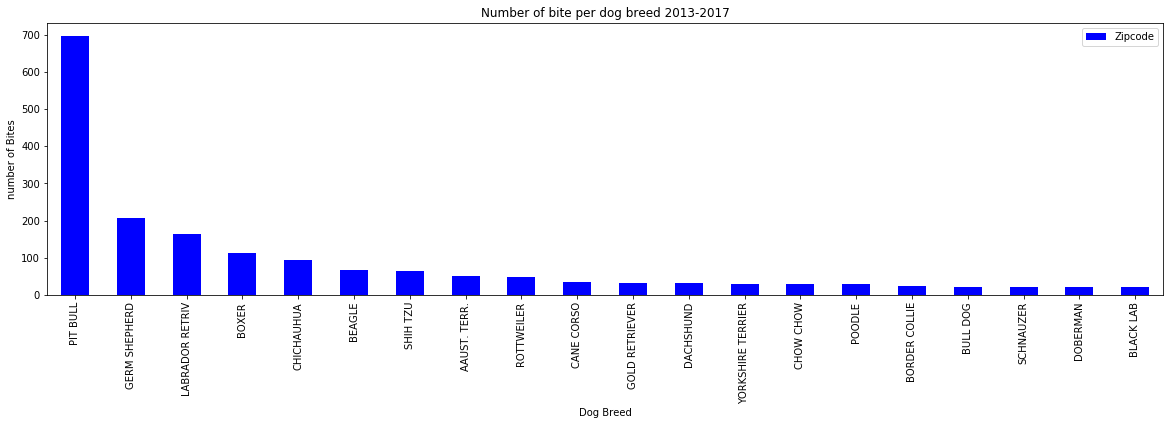

In [40]:
#filter animal bite data for the 5 years
bite_per_breed.head(20).plot(kind= "bar",color="b", figsize=(20,5))
plt.title("Number of bite per dog breed 2013-2017")
plt.xlabel("Dog Breed")
plt.ylabel("number of Bites")
plt.show()

In [64]:
#chart for top 2 dog breeds with highest bites by year (2013-2017)
#Group by multiple columns
# creates a dataframe with multiple indexes.
grouped_by_Year_AND_Breed_df = clean_data.groupby(["Year", "Breed"])
grouped_by_Year_AND_Breed_df = grouped_by_Year_AND_Breed_df.count()

In [98]:
grouped_by_Year_AND_Breed_df.drop([''])
grouped_by_Year_AND_Breed_df

Animal  Zipcode  Where Biten  Gender
Year Breed                                                  
     AAUST. TERR.            1        1            0       1
     AKITA                   1        1            0       1
     AM. ESKIMO              1        1            0       1
     BEAGLE                  1        1            0       1
     BERNESEN MT.            1        0            0       1
...                        ...      ...          ...     ...
2017 SIBERAN HUSKY           5        5            5       4
     TOY POODLE              1        1            1       1
     WEIMARANER              4        4            4       2
     WESTIE                  1        1            1       1
     YORKSHIRE TERRIER       4        4            4       3

[366 rows x 4 columns]

In [81]:
#Search for 2017 only, all breeds
grouped_by_Year_AND_Breed_df.loc['2017']

,Animal,Zipcode,Where Biten,Gender
Breed,,,,
AAUST. TERR.,15,15,15,14
AKITA,3,3,3,2
ALASK. MALAMUTE,2,2,2,2
AM BULLDOG,2,2,2,2
AM. ESKIMO,1,1,1,1
...,...,...,...,...
SIBERAN HUSKY,5,5,5,4
TOY POODLE,1,1,1,1
WEIMARANER,4,4,4,2


The top two breeds for the most bites of 2017 include Pit Bull and Labrador Retriever


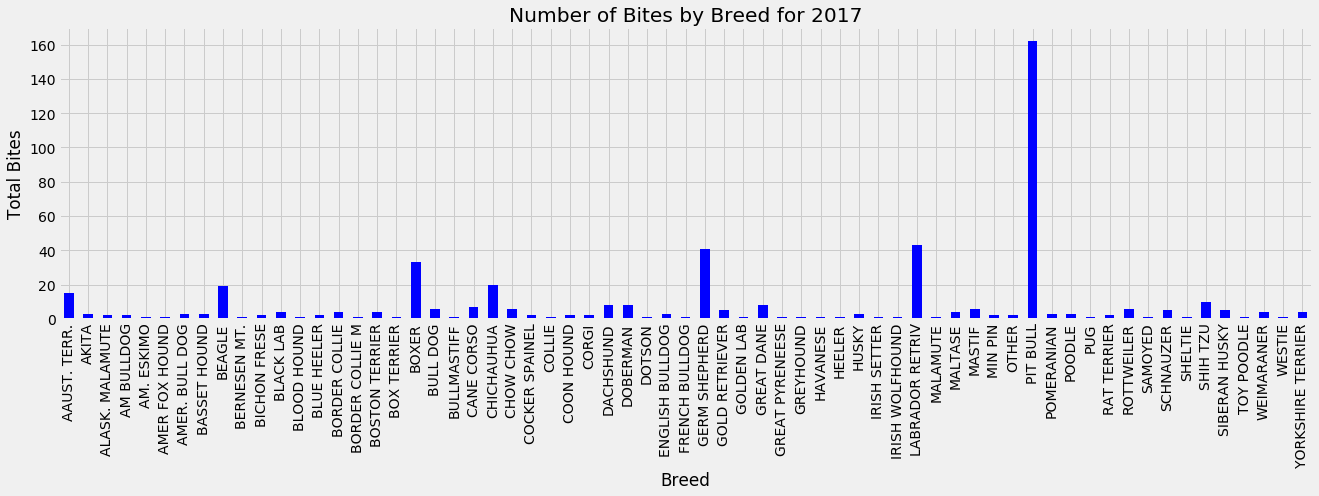

In [102]:
#bar plot of all breeds in 2017 only
matplotlib.style.use('fivethirtyeight') 
grouped_by_Year_AND_Breed_df.loc['2017']['Animal'].plot(kind='bar', color="b", figsize=(20,5))
plt.title("Number of Bites by Breed for 2017")
plt.ylabel("Total Bites")
print(f'The top two breeds for the most bites of 2017 include Pit Bull and Labrador Retriever')

In [86]:
#Search for 2016 only, all breeds
grouped_by_Year_AND_Breed_df.loc['2016']

,Animal,Zipcode,Where Biten,Gender
Breed,,,,
AAUST. TERR.,7,7,7,7
AKITA,2,2,2,1
ALASK. MALAMUTE,1,1,1,1
AM BULLDOG,4,4,4,3
AM. ESKIMO,2,2,2,2
...,...,...,...,...
TOY FOX TERRIER,1,1,1,1
TOY POODLE,1,1,1,1
WEIMARANER,2,2,2,2


The top two breeds for the most bites of 2016 include Pit Bull and German Shepherd


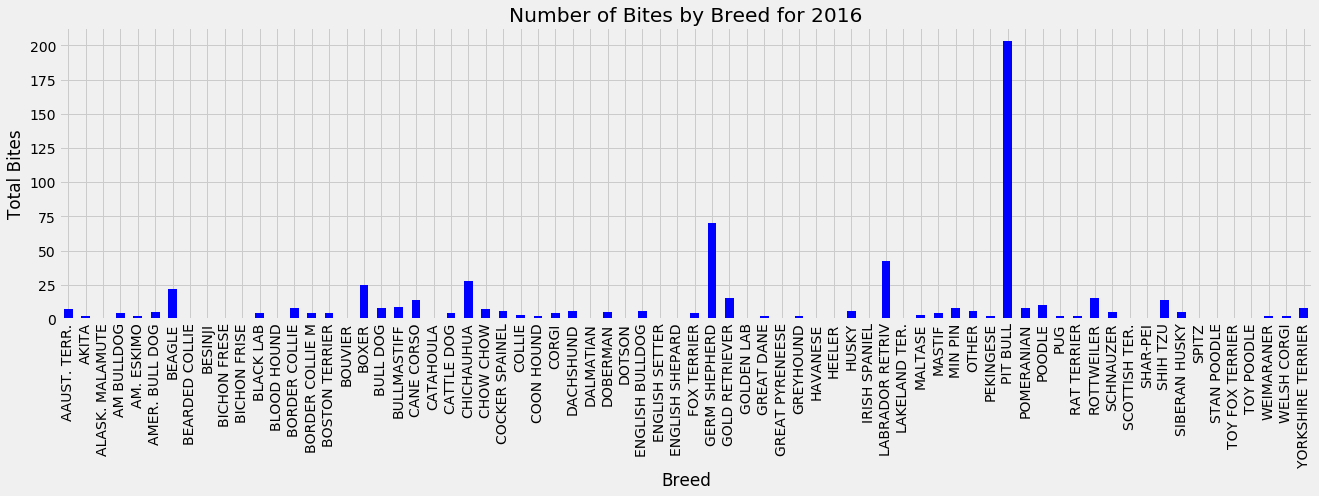

In [88]:
#bar plot of all breeds in 2016 only
matplotlib.style.use('fivethirtyeight') 
grouped_by_Year_AND_Breed_df.loc['2016']['Animal'].plot(kind='bar', color="b", figsize=(20,5))
plt.title("Number of Bites by Breed for 2016")
plt.ylabel("Total Bites")
print(f'The top two breeds for the most bites of 2016 include Pit Bull and German Shepherd')

In [89]:
#Search for 2015 only, all breeds
grouped_by_Year_AND_Breed_df.loc['2015']

,Animal,Zipcode,Where Biten,Gender
Breed,,,,
AAUST. TERR.,21,20,21,20
AIREDALE TER.,1,1,1,1
ALASK. MALAMUTE,1,1,1,1
AM BULLDOG,2,2,2,2
AMER. BULL DOG,2,2,2,2
...,...,...,...,...
TOY FOX TERRIER,1,1,1,1
TOY POODLE,1,1,1,1
WEINER DOG,1,1,1,1


The top two breeds for the most bites of 2015 include Pit Bull and German Shepherd


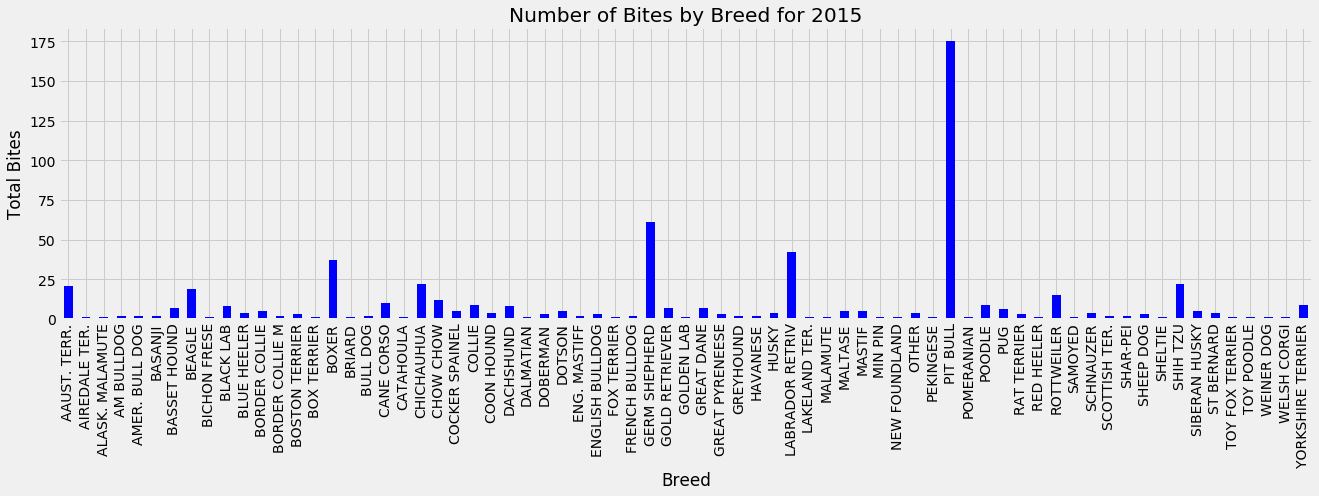

In [91]:
#bar plot of all breeds in 2015 only
matplotlib.style.use('fivethirtyeight') 
grouped_by_Year_AND_Breed_df.loc['2015']['Animal'].plot(kind='bar', color="b", figsize=(20,5))
plt.title("Number of Bites by Breed for 2015")
plt.ylabel("Total Bites")
print(f'The top two breeds for the most bites of 2015 include Pit Bull and German Shepherd')

In [92]:
#Search for 2014 only, all breeds
grouped_by_Year_AND_Breed_df.loc['2014']

,Animal,Zipcode,Where Biten,Gender
Breed,,,,
AAUST. TERR.,7,3,7,7
AKITA,5,3,5,4
ALASK. MALAMUTE,1,0,1,1
AM BULLDOG,6,5,5,5
AMER. BULL DOG,3,2,3,3
...,...,...,...,...
SPITZ,1,1,1,1
TOY POODLE,1,1,1,0
WEIMARANER,2,1,2,0


The top two breeds for the most bites of 2014 include Pit Bull and German Shepherd


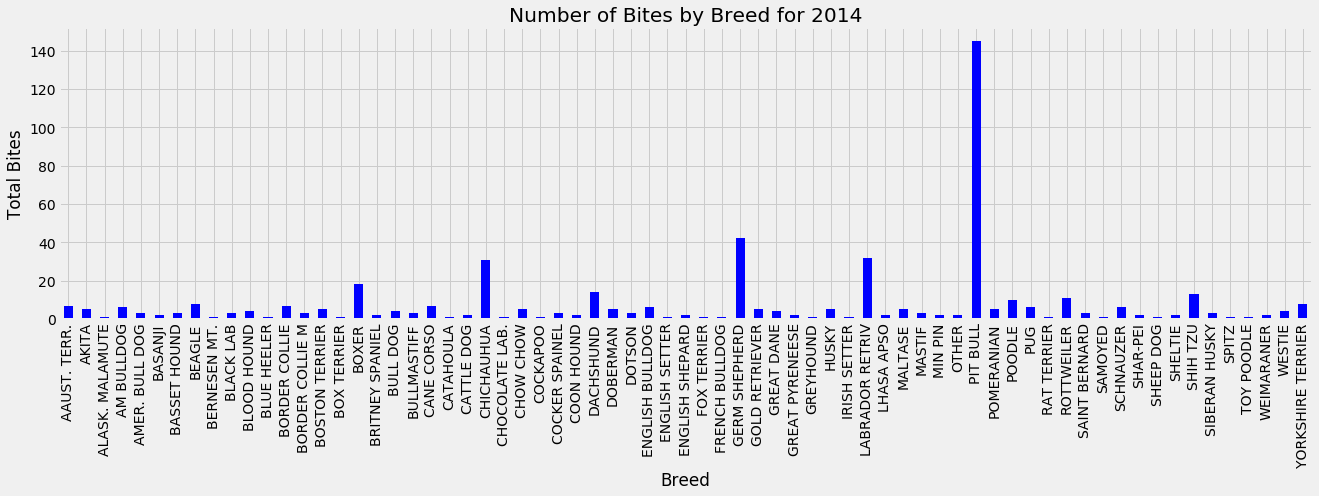

In [94]:
#bar plot of all breeds in 2014 only
matplotlib.style.use('fivethirtyeight') 
grouped_by_Year_AND_Breed_df.loc['2014']['Animal'].plot(kind='bar', color="b", figsize=(20,5))
plt.title("Number of Bites by Breed for 2014")
plt.ylabel("Total Bites")
print(f'The top two breeds for the most bites of 2014 include Pit Bull and German Shepherd')

In [ ]:
#Search for 2013 only, all breeds
grouped_by_Year_AND_Breed_df.loc['2013']

The top two breeds for the most bites of 2013 include Pit Bull and Labrador Retriever


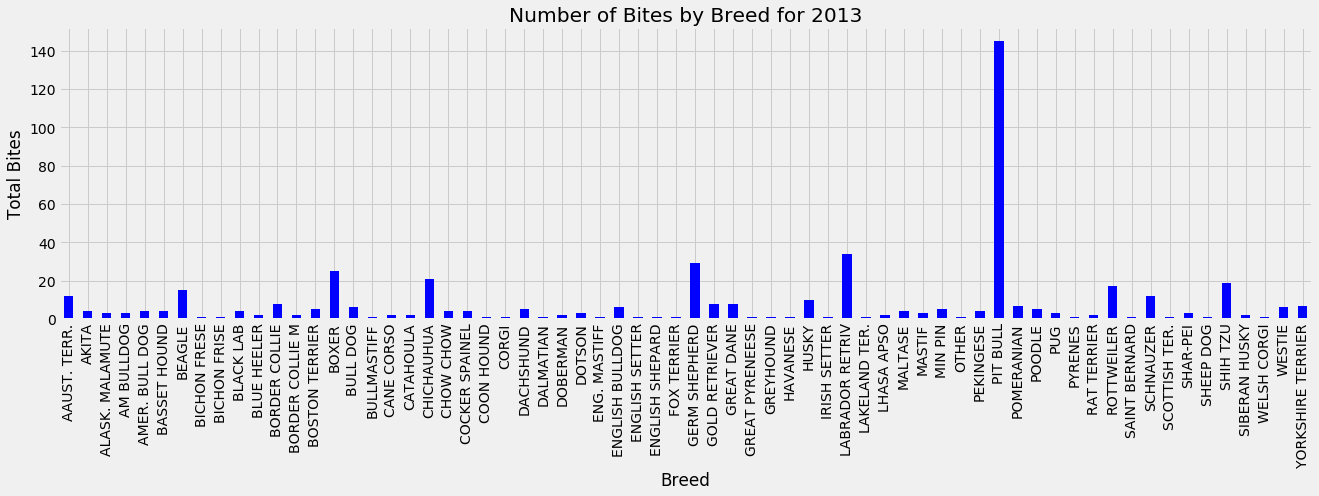

In [96]:
#bar plot of all breeds in 2014 only
matplotlib.style.use('fivethirtyeight') 
grouped_by_Year_AND_Breed_df.loc['2013']['Animal'].plot(kind='bar', color="b", figsize=(20,5))
plt.title("Number of Bites by Breed for 2013")
plt.ylabel("Total Bites")
print(f'The top two breeds for the most bites of 2013 include Pit Bull and Labrador Retriever')

In [99]:
print(f'Overall, Pit Bulls rank number one across all five years for having the most amount of bites')
print(f'The number two spot for the breed for most amount of bites varies slightly by year(2013 and 2017), between German Shepherd and Labrador Retriever')

Overall, Pit Bulls rank number one across all five years for having the most amount of bites
The number two spot for the breed for most amount of bites varies slightly by year, between German Shepherd and Labrador Retriever


In [19]:
gender_zip= clean_data.groupby(["Gender"])["Zipcode"].count().reset_index()
gender_zip2= gender_zip.sort_values(["Zipcode"],ascending=False)
gender= gender_zip2.set_index("Gender")
gender 

,Zipcode
Gender,
MALE,1840
FEMALE,938
UNKNOWN,105


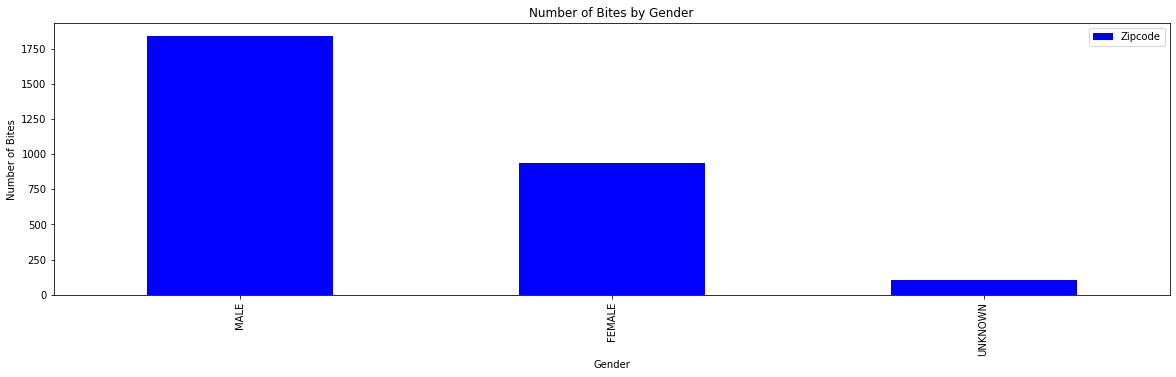

Based on the chart, males have almost double the amount of bites than females among the zipcodes in Louisville, Kentucky


In [20]:
gender.head(20).plot(kind= "bar",color="b", figsize=(20,5))
plt.title("Number of Bites by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Bites")
plt.show()

print(f'Based on the chart, males have almost double the amount of bites than females among the zipcodes in Louisville, Kentucky')

In [ ]:
#Import crime data and then run a test against the animal bites for a five year period to see if there is any correlation between crime and dog bites
